<a href="https://colab.research.google.com/github/debbydauda/Kaggle-dataset/blob/main/Car_fuel_efficiency_prediction_using_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
# Car Fuel Efficiency Prediction (Using Seaborn MPG Dataset)

## Instructions for the Exercise

1. **Explore the Dataset**  
   - Load the Seaborn `mpg` dataset.  
   - Check for missing values and handle them appropriately.  
   - Identify the key features (`cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`) and the target variable (`mpg`).  

2. **Data Visualization**  
   - Plot `weight` vs. `mpg` using Seaborn to analyze their relationship.  
   - Try additional visualizations to explore other feature correlations.  

3. **Model Training**  
   - Split the dataset into training and testing sets.  
   - Train a model of your choice to predict `mpg`.  
   - Evaluate model performance using MAE and RMSE.  

4. **Deploy with Gradio**  
   - Implement a Gradio interface where users can input car specifications.  
   - Display the predicted fuel efficiency (`mpg`).  
   - Run the app and test predictions.  

"""

In [ ]:
!pip install seaborn scikit-learn gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

# **Loading** **the** **datasets** **and** **Handling** **missing** **values**

In [ ]:
import seaborn as sns
import pandas as pd

# Load the 'mpg' dataset from seaborn
mpg_data = sns.load_dataset('mpg')

# Check for missing values
print(mpg_data.isnull().sum())

# Handle missing values (e.g., replace with mean)
mpg_data['horsepower'] = mpg_data['horsepower'].fillna(mpg_data['horsepower'].mean())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


# **Data Visualization**

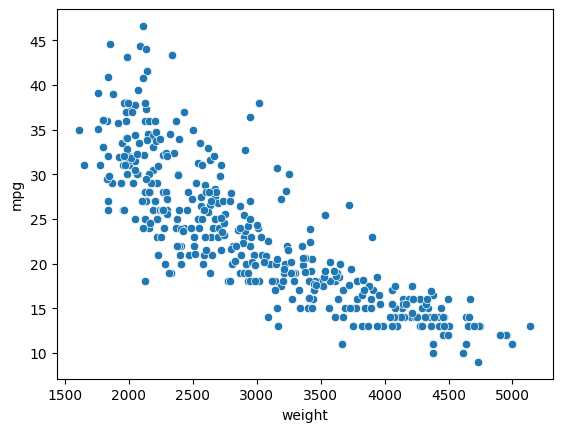

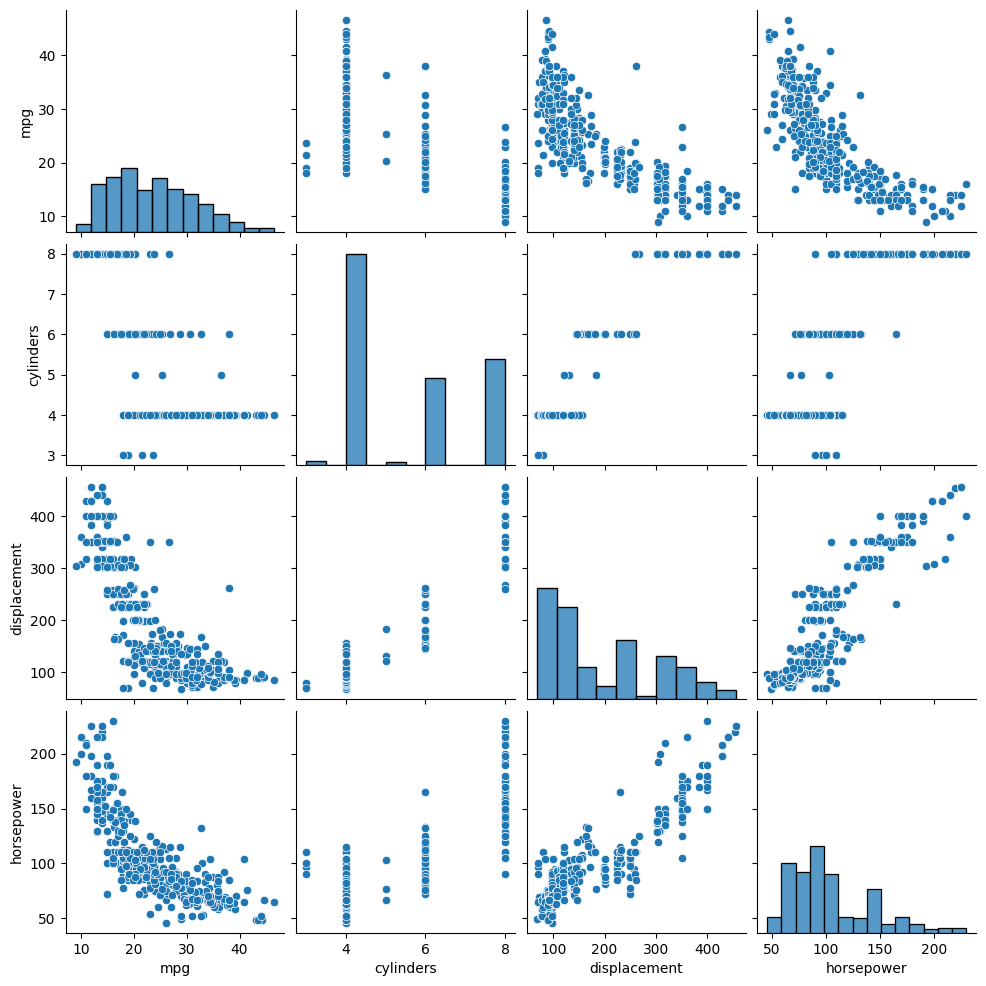

In [ ]:
import matplotlib.pyplot as plt

# Plot weight vs. mpg
sns.scatterplot(x='weight', y='mpg', data=mpg_data)
plt.show()

# Explore other feature correlations (example)
sns.pairplot(mpg_data[['mpg', 'cylinders', 'displacement', 'horsepower']])
plt.show()

**Model** **Training** **and** **Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np # Import numpy for square root calculation

# ... (rest of your code) ...

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE using NumPy's sqrt

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 3.1174894969443887
RMSE: 3.8297880635592056


**Deploying** **with** **Gradio**

In [ ]:
import gradio as gr

def predict_mpg(cylinders, displacement, horsepower, weight, acceleration):
    input_data = [[cylinders, displacement, horsepower, weight, acceleration]]
    prediction = model.predict(input_data)[0]
    return f"Predicted MPG: {prediction:.2f}"

iface = gr.Interface(
    fn=predict_mpg,
    inputs=[
        gr.Number("Cylinders", value=4),
        gr.Number("Displacement", value=100),
        gr.Number("Horsepower", value=75),
        gr.Number("Weight", value=2500),
        gr.Number("Acceleration", value=15),

     ],
    outputs="text",
    title="Car Fuel Efficiency Prediction",
    description="Enter car specifications to predict its fuel efficiency (MPG).",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://03ca80169a43afada6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
